In [ ]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline

## Simple Linear Regression

In [ ]:
## Importing Dataset
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight VS Height')

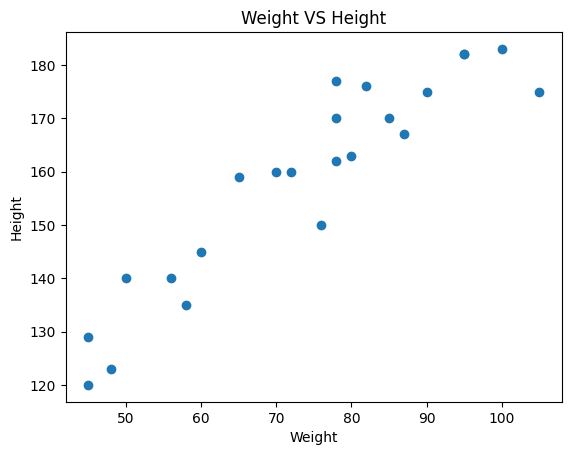

In [6]:
## ScatterPlot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight VS Height")

In [7]:
## Finding Co-relation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


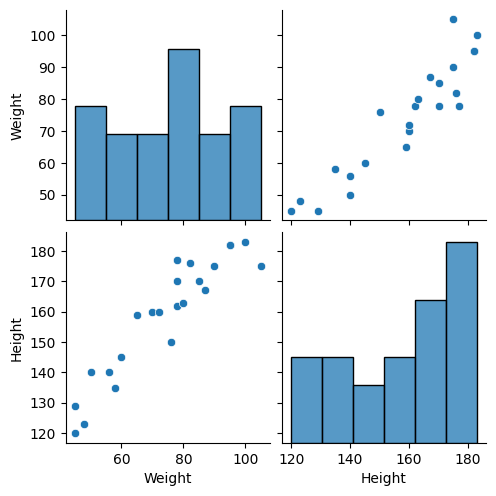

In [9]:
## Using Seaborn
sns.pairplot(df)

In [ ]:
## Independent and Dependent Features
x = df[['Weight']]    ## Independent Feature should be a Dataframe or a 2-dim array
# np.array(x).shape   # ---> Two Dimentional Array

y = df['Height']      ## Dependent Feature can be a One-Dimentional or Series
np.array(y).shape

(23,)

In [13]:
x_series = df['Weight']
np.array(x_series).shape

(23,)

In [16]:
## Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state= 42)

In [ ]:
x_train.shape     # It is Two Dimension

(17, 1)

In [20]:
## Standardization
sc = StandardScaler()

#For Training Data
x_train = sc.fit_transform(x_train)

#For Testing Data
x_test = sc.transform(x_test)

## Fit is used for testing data because I dont want my training data
## to know info about my test data.

In [24]:
## Applying Linear Regression
lr = LinearRegression(n_jobs= -1)
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [26]:
## Slope and Intercept
print("Coefficient of SLope: ", lr.coef_)
print("Intercept", lr.intercept_)

Coefficient of SLope:  [17.2982057]
Intercept 156.47058823529412


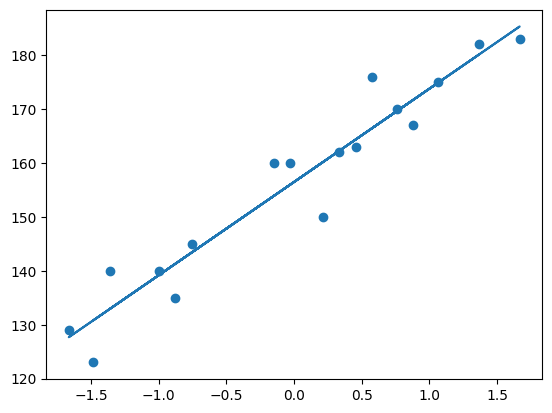

In [27]:
## Plot Training Data best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train))

In [29]:
## Prediction for test Data
## 1.) predicted height output = intercept + coef(weights)
## 2.) y_pred_test = 156.470 + 17.29(x_test)

y_pred = lr.predict(x_test)

In [34]:
## Performance Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Absolute Error: ", rmse)

Mean Squared Error:  114.84069295228699
Mean Absolute Error:  9.66512588679501
Root Mean Absolute Error:  10.716374991212605


In [35]:
## R Square
score = r2_score(y_test, y_pred)
print("R2 Score: ", score)

R2 Score:  0.7360826717981276


In [36]:
## Adjusted R-Squared
1 - (1 - score) * (len(y_test) - 1)/ (len(y_test) - x_test.shape[1] - 1)

0.6701033397476595

## OLS Linear Regression

In [38]:
import statsmodels.api as sm

In [39]:
model = sm.OLS(y_train, x_train).fit()

In [40]:
prediction = model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [42]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 29 Dec 2025   Prob (F-statistic):                       0.664
Time:                        11:53:14   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
## Prediction for new Data
lr.predict(sc.transform([[72]]))

c:\Users\singh\OneDrive\Desktop\Data-Science\DataScienceEnv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])